In [490]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/BP_data.csv", index_col=0)
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1


In [491]:
df.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [492]:
df = df.dropna()
df.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [493]:
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
16,1,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0
29,1,9.37,0.95,38,11,1,0.0,0,30738,48217,336.0,1,1,1
31,0,14.19,0.37,40,46,1,0.0,0,3922,39971,8.0,3,0,1
36,0,10.49,0.54,25,16,1,1.0,0,14798,26236,449.0,3,0,0


In [494]:
df["Blood_Pressure_Abnormality"].value_counts()

Blood_Pressure_Abnormality
1    163
0    155
Name: count, dtype: int64

In [495]:
X = df.drop("Blood_Pressure_Abnormality", axis=1).values
y = df['Blood_Pressure_Abnormality'].values

X, y

(array([[11.69,  0.75, 43.  , ...,  3.  ,  1.  ,  1.  ],
        [10.96,  0.1 , 43.  , ...,  1.  ,  1.  ,  0.  ],
        [ 9.37,  0.95, 38.  , ...,  1.  ,  1.  ,  1.  ],
        ...,
        [11.12,  0.57, 29.  , ...,  1.  ,  0.  ,  0.  ],
        [14.74,  0.88, 33.  , ...,  1.  ,  1.  ,  0.  ],
        [14.56,  0.27, 41.  , ...,  1.  ,  0.  ,  0.  ]]),
 array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0

In [496]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((254, 13), (64, 13), (254,), (64,))

In [497]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [498]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [499]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([254, 13]),
 torch.Size([64, 13]),
 torch.Size([254]),
 torch.Size([64]))

In [578]:
class DiabetesClass(nn.Module):
    def __init__(self):
        super(DiabetesClass, self).__init__()
        self.fc1 = nn.Linear(13, 16)
        self.fc2 = nn.Linear(16, 16)
        # self.fc3 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc5(x))
        x = self.fc4(x)
        return x

model = DiabetesClass()

In [580]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [582]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        # print(labels.float().unsqueeze(1))
        loss = criterion(outputs, labels.float().unsqueeze(1))
        # loss = criterion(outputs, labels.float().unsqueeze(1))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            # _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            # correct += (predicted == labels).sum().item()

            predicted_probabilities = torch.sigmoid(outputs)
            predicted = (predicted_probabilities > 0.5).float()
            correct += (predicted == labels.float().unsqueeze(1)).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 0.7000, Accuracy: 60.94%
Epoch 2/30, Loss: 0.6927, Accuracy: 64.06%
Epoch 3/30, Loss: 0.6852, Accuracy: 50.00%
Epoch 4/30, Loss: 0.6759, Accuracy: 45.31%
Epoch 5/30, Loss: 0.6632, Accuracy: 48.44%
Epoch 6/30, Loss: 0.6481, Accuracy: 53.12%
Epoch 7/30, Loss: 0.6227, Accuracy: 62.50%
Epoch 8/30, Loss: 0.5944, Accuracy: 64.06%
Epoch 9/30, Loss: 0.5642, Accuracy: 67.19%
Epoch 10/30, Loss: 0.5357, Accuracy: 73.44%
Epoch 11/30, Loss: 0.5087, Accuracy: 73.44%
Epoch 12/30, Loss: 0.4886, Accuracy: 73.44%
Epoch 13/30, Loss: 0.4686, Accuracy: 73.44%
Epoch 14/30, Loss: 0.4522, Accuracy: 79.69%
Epoch 15/30, Loss: 0.4369, Accuracy: 79.69%
Epoch 16/30, Loss: 0.4236, Accuracy: 76.56%
Epoch 17/30, Loss: 0.4172, Accuracy: 78.12%
Epoch 18/30, Loss: 0.4020, Accuracy: 79.69%
Epoch 19/30, Loss: 0.3960, Accuracy: 79.69%
Epoch 20/30, Loss: 0.3847, Accuracy: 73.44%
Epoch 21/30, Loss: 0.3762, Accuracy: 79.69%
Epoch 22/30, Loss: 0.3601, Accuracy: 81.25%
Epoch 23/30, Loss: 0.3516, Accuracy: 82.8

In [584]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        # _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        
        predicted_probabilities = torch.sigmoid(outputs)
        predicted = (predicted_probabilities > 0.5).float()
        
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# print(all_labels)
# print(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[30  9]
 [ 2 23]]
F1 Score: 0.83
Precision: 0.85
Recall: 0.83
Specificity: 0.84


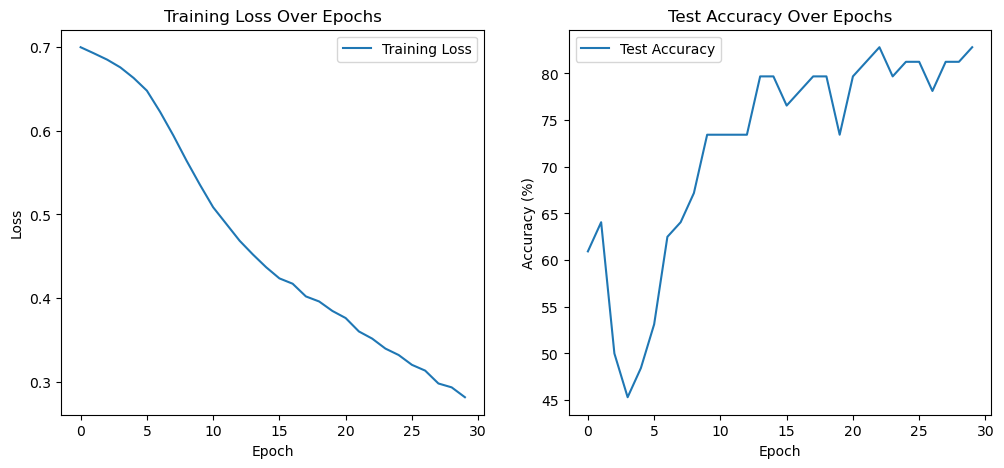

In [586]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()